In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## First we will merge all 12 months of data and create a new excel file to hold the data

In [2]:
#Getting the names of sheets in the directory
files=[file for file in os.listdir('D:\python\Sales Project\Month_wise_sales_data')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
all_data=pd.DataFrame()  #empty dataframe

for f in files:
    data=pd.read_csv("D:/python/Sales Project/Month_wise_sales_data/"+f)
    all_data=pd.concat([all_data,data])
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.to_csv("all_months_data.csv", index=False) 

#### We have created a new file by the name all_data.csv. We will now analyze data

## Cleaning the data of missing values

In [5]:
na_data=all_data[all_data.isna().any(axis=1)]
na_data
# found 545 rows with No values.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
temp_df=all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df
#Need to drop these rows with Or in month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
#Adding another column for month
   #month column will have month number in str form. Need it in numerical form
all_data['month']=all_data['Order Date'].str[0:2]
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [9]:
all_data=all_data[all_data.month!='Or'] #Some of the month columns have Or instead of number because, Order date is unclean

In [10]:
all_data['month']=all_data['month'].astype('int32') #month number converted to int

## First we need to know the best month for sales and how much was earned that month


In [11]:
all_data.info()
#Need quantity ordered and price each in int or float to calculate sale amount

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
month               185950 non-null int32
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [12]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('int32')
all_data['Price Each']=all_data['Price Each'].astype('float')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int32
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
month               185950 non-null int32
dtypes: float64(1), int32(2), object(4)
memory usage: 9.9+ MB


In [13]:
#Adding a column to calculate sale
all_data['sale_amount']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale_amount
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Max sale in US dollar was  4613443.340001534 $


Text(0.5, 0, 'Month Number')

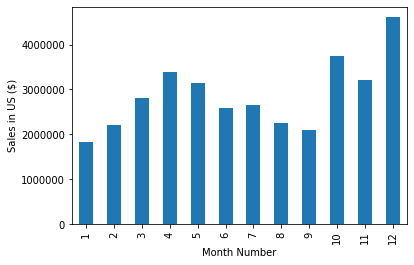

In [14]:
max_sale=all_data.groupby('month').sale_amount.sum()
print("Max sale in US dollar was ", max_sale.max(),"$")
max_sale.plot.bar()
plt.ylabel('Sales in US ($)')
plt.xlabel('Month Number')
#We can see that December had the max sale

## Insights #1
#### We can see that the max sales happened in December month. This can be due to the fact that there are holidays like christmas, new year etc

## Secondly, we need to know what city had the highest number of sales

In [15]:
def f(a):
    add=a['Purchase Address'].split(',')
    return add[1]
all_data['city']=all_data.apply(f, axis=1)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale_amount,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [16]:
city_sale=pd.DataFrame(all_data.groupby('city').sale_amount.sum())
city_sale

,sale_amount
city,
Atlanta,2.795499e+06
Austin,1.819582e+06
Boston,3.661642e+06
Dallas,2.767975e+06
Los Angeles,5.452571e+06
New York City,4.664317e+06
Portland,2.320491e+06
San Francisco,8.262204e+06
Seattle,2.747755e+06


In [17]:
for i in city_sale[city_sale.sale_amount==city_sale.sale_amount.max()].index:
    max_city=i
sale_max=city_sale.sale_amount.max()
print("Max sale happened in {} and the amount was {} $".format(max_city,sale_max))

Max sale happened in  San Francisco and the amount was 8262203.910004012 $


Text(0, 0.5, 'Sale Amount in US dollar')

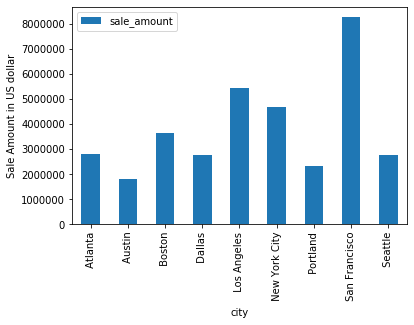

In [18]:
city_sale.plot.bar()
plt.ylabel("Sale Amount in US dollar")

## Insights #2
#### San Francisco has highest sale. This may be due to the fact that the sale data is of electronics items and people at sillicon valley may be buying a lot of electronics for business and startups. People have more money in San Fransisco. Also may be the advertising is very good.

## Thirdly, we are interested to know, what time should we display advertisement to maximise the likelyhood of customers buying products

In [19]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [20]:
all_data['hour']=all_data['Order Date'].dt.hour
all_data['minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale_amount,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


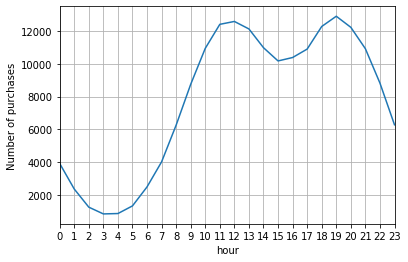

In [149]:
all_data.groupby('hour')['Order ID'].count().plot()
plt.xticks(all_data.hour.unique())
plt.xlabel("hour")
plt.ylabel('Number of purchases')
plt.grid()
#Max orders are placed between 11 am to 1 pm and 6 pm to 8 pm. These are the hours when people usually are on break, or mid day or people come back from work
#My recommendation to display ads would be at 10 am to 2 pm or 5 pm to 9 pm

## Fourthly, we are interested in know what products are mostly sold together?

In [21]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df['grouped']=df.groupby('Order ID').Product.transform(lambda x:','.join(x))
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sale_amount,city,hour,minute,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [22]:
drop_df=df[['Order ID', 'grouped']].drop_duplicates()
drop_df.head()

,Order ID,grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [23]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in df['grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,3)))

for product,frequency in count.most_common(10):
    print(product, frequency)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 271
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 193
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 146
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 109
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 101
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 86
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 75
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 50
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 17


## Lastly, what product was sold the most and why?

Text(0, 0.5, 'Quantity Ordered')

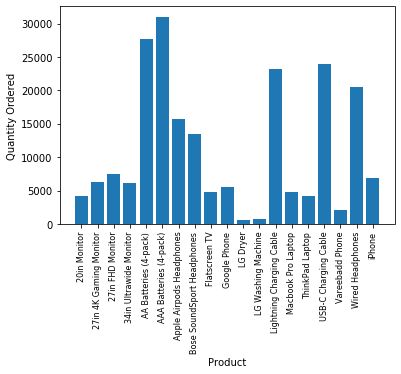

In [200]:
product_group=all_data.groupby('Product')
quatity_ord=product_group.sum()['Quantity Ordered']
products=[a[0] for a in product_group]
plt.bar(products, quatity_ord)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

# AAA batteries and AA battery are sold most. This can be due to the fact that they are cheap and Lg dryer and washing machine r not


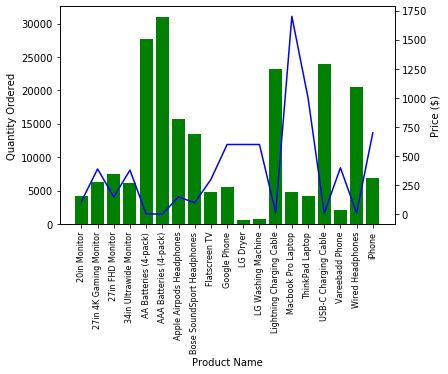

In [209]:
prices=all_data.groupby('Product').mean()['Price Each']
fig, axis1=plt.subplots()
axis2=axis1.twinx()
axis1.bar(products, quatity_ord, color='g')
axis2.plot(products, prices,'b-')

axis1.set_xlabel('Product Name')
axis1.set_ylabel('Quantity Ordered')
axis2.set_ylabel('Price ($)')
axis1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()